# PBL Calculations for the Vaisala CL-61

[CROCUS](https://crocus-urban.org/) utilizes the Vasiala CL-61 within the Chicago Micronet Level 3 nodes. <br>
Data are collected at the instrument via the Waggle node. <br>
Data are hosted on the [CROCUS Thredds Server](https://thredds.crocus-urban.org/thredds/catalog/neiu-ceilometer-a1/catalog.html)

Continous observations of Plantary Boundary Layer height will help develop urban PBL climatology

Tests methods developed by the ARM Summer School 2025 "Boundary Layers in Multiple Places (BLIMP)" project

In [1]:
import glob

import numpy as np
import xarray as xr
from xarray.backends import NetCDF4DataStore
import matplotlib.pyplot as plt

import act
import cmweather

## Default Parameters

In [2]:
DATE = "20230801"

In [3]:
file_list = sorted(glob.glob("/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/*" + DATE + "*"))

In [4]:
file_list

['/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/ceilometer_20230801_131050.txt',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_000051.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_000551.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_001051.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_001551.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_002051.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_002551.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_003051.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_003551.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_004051.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_004550.nc',
 '/Users/jrobrien/ANL/Instruments/Vaisala_CL61/data/cmscl6001_20230801_005050.nc',
 '

## Read the CL-61 Data, Correct with ACT and Display

In [5]:
# read all the files within the filelist
ds = act.io.read_arm_netcdf(file_list[1:])

variables=['beta_att', 'p_pol', 'x_pol', 'linear_depol_ratio']
#variables=['beta_att', 'p_pol', 'x_pol']
for var in variables:
    if var != 'linear_depol_ratio':
        ds = act.corrections.correct_ceil(ds, var_name=var)

# update the ceilometer datastream name
ds.attrs['datastream'] = 'crocus-NEIU-ceilometer.b1'

Text(0.5, 0, 'Time [UTC]')

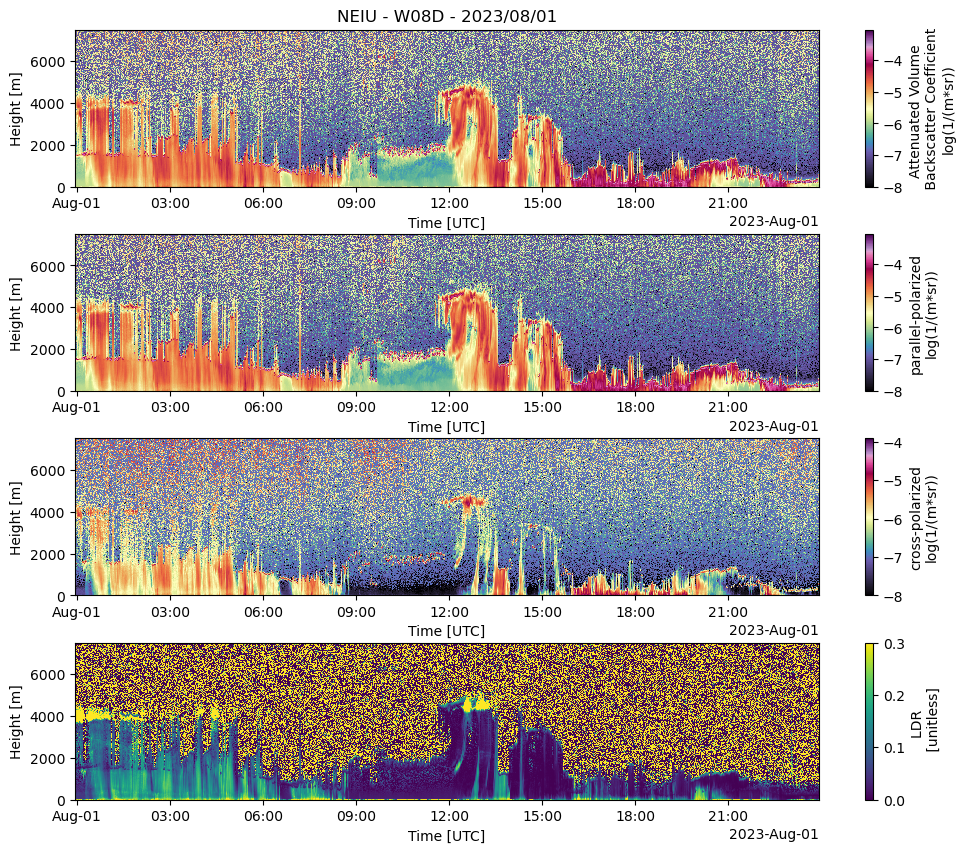

In [6]:
fig, axarr = plt.subplots(4, 1, figsize=[12, 10])
fig.subplots_adjust(hspace=0.3)

axn = 0
newDate = DATE[0:4] + '/' + DATE[4:6] + '/' + DATE[6:8]
for variable in variables:
    #display = act.plotting.TimeSeriesDisplay(ds, figsize=(8,4))
    if variable == 'linear_depol_ratio':
        cbs = ds[variable].plot(x='time',
                                vmin=0,
                                vmax=0.3,
                                ax=axarr[axn],
                                add_labels=False,
                                add_colorbar=False
        )
        axarr[axn].set_ylabel("Height [m]")
        axarr[axn].set_xlabel("Time [UTC]")
        axarr[axn].set_ylim([0, 7500])
        cbar = fig.colorbar(cbs)
        cbar.set_label("LDR \n [unitless]")
        axn += 1
    else:
        cbs = ds[variable].plot(x='time',
                                cmap='ChaseSpectral',
                                vmin=-8,
                                ax=axarr[axn],
                                add_labels=False,
                                add_colorbar=False
        )
        axarr[axn].set_ylabel("Height [m]")
        axarr[axn].set_xlabel("Time [UTC]")
        axarr[axn].set_ylim([0, 7500])
        cbar = fig.colorbar(cbs)
        if ds[variable].long_name.split(" ")[0] == "attenuated":
            cbar.set_label("Attenuated Volume \n Backscatter Coefficient \n" + ds[variable].units)
        else:
            cbar.set_label(ds[variable].long_name.split(" ")[0] + '\n' + ds[variable].units)
        axn += 1

axarr[0].set_title("NEIU - W08D - " + newDate)
axarr[3].set_xlabel("Time [UTC]")
##plt.savefig('NEIU_W08D_' + DATE + '_CL61.png')

## PBL Calculations - Gradient Method

In [7]:
ds

<xarray.Dataset> Size: 95MB
Dimensions:                            (time: 1440, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 12kB 2023-07-31T...
  * range                              (range) float64 26kB 0.0 ... 1.572e+04
  * layer                              (layer) float64 40B 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 8B -87.72
    latitude                           float64 8B 41.98
Data variables: (12/26)
    cloud_base_heights                 (time, layer) float64 58kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    vertical_visibility                (time) float64 12kB dask.array<chunksize=(5,), meta=np.ndarray>
    p_pol                              (time, range) float32 19MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    x_pol                              (time, range) float32 19MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    beta_att                           (time, range) float32 19MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    linear_depol_ratio                 (time, range) float32 19MB dask.array<chunksize=(1, 3276), meta=np.ndarray>
    ...                                 ...
    fog_detection                      (time) float32 6kB dask.array<chunksize=(5,), meta=np.ndarray>
    receiver_gain                      (time) float32 6kB dask.array<chunksize=(5,), meta=np.ndarray>
    range_resolution                   (time) float32 6kB 4.8 4.8 ... 4.8 4.8
    cloud_calibration_factor           (time) float64 12kB 0.4334 ... 0.4334
    cloud_calibration_factor_user      (time) float64 12kB 0.4334 ... 0.4334
    overlap_function                   (time, range) float32 19MB dask.array<chunksize=(5, 3276), meta=np.ndarray>
Attributes: (12/19)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    profile_interval_in_seconds:    60
    _file_dates:                    ['20230731', '20230731', '20230731', '202...
    _file_times:                    ['235551', '235551', '235551', '235551', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0
    datastream:                     crocus-NEIU-ceilometer.b1

In [8]:
np.floor(ds['beta_att'].values)

array([[-6., -6., -6., ..., -5., -7., -7.],
       [-6., -6., -6., ..., -7., -7., -7.],
       [-5., -6., -6., ..., -5., -5., -5.],
       ...,
       [-6., -6., -6., ..., -5., -5., -5.],
       [-6., -6., -6., ..., -5., -5., -6.],
       [-6., -6., -6., ..., -7., -7., -7.]],
      shape=(1440, 3276), dtype=float32)

In [9]:
np.fix(ds['beta_att'].values)

array([[-5., -5., -5., ..., -4., -7., -7.],
       [-5., -5., -5., ..., -7., -7., -7.],
       [-4., -5., -5., ..., -4., -4., -4.],
       ...,
       [-5., -5., -5., ..., -4., -4., -4.],
       [-5., -5., -5., ..., -4., -4., -5.],
       [-5., -5., -5., ..., -7., -7., -7.]],
      shape=(1440, 3276), dtype=float32)

In [10]:
np.diff(np.floor(ds['beta_att'][10, :]))

array([0., 0., 0., ..., 0., 0., 0.], shape=(3275,), dtype=float32)

In [11]:
joe = np.where(np.diff(np.floor(ds['beta_att'][10, :])) < 0)[0][0]

In [12]:
ds['range'][joe].data

array(374.4)

In [20]:
pbl_index = []
for i in range(len(ds['time'])):
    pbl_index.append(np.where(np.diff(np.floor(ds['beta_att'][i, :])) < 0)[0][0])

In [21]:
ds['range'][pbl_index]

<xarray.DataArray 'range' (range: 1440)> Size: 12kB
array([364.8, 379.2,   0. , ..., 331.2, 283.2, 561.6], shape=(1440,))
Coordinates:
  * range      (range) float64 12kB 364.8 379.2 0.0 340.8 ... 331.2 283.2 561.6
    longitude  float64 8B -87.72
    latitude   float64 8B 41.98
Attributes:
    units:      m
    long_name:  measurement distance from the instrument in the direction of ...
    axis:       Z
    positive:   up

In [22]:
ds = ds.assign(pbl_gradient=xr.DataArray(ds['range'][pbl_index].data, dims="time"))

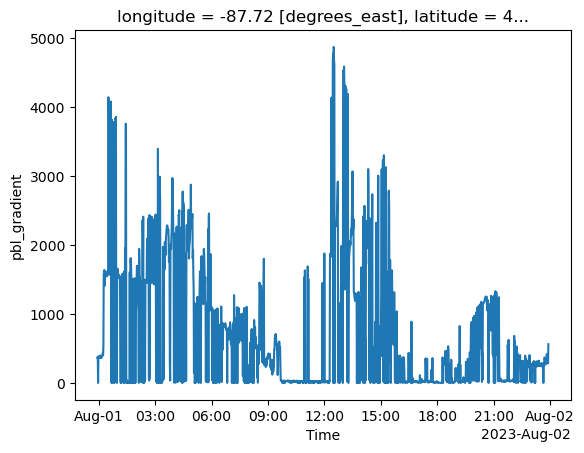

In [23]:
ds['pbl_gradient'].plot()

In [24]:
filter = ds.where(ds["pbl_gradient"] > 50, drop=False)

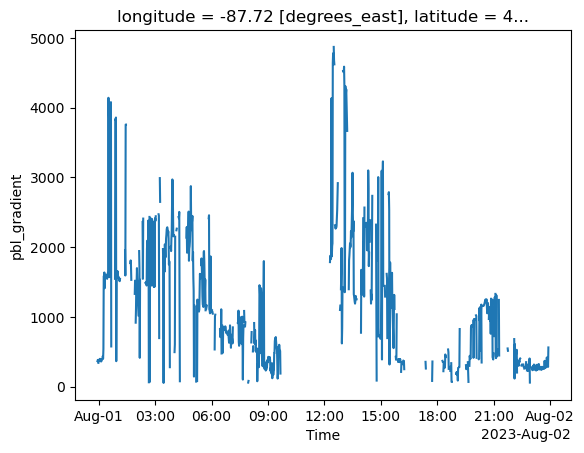

In [25]:
filter["pbl_gradient"].plot()

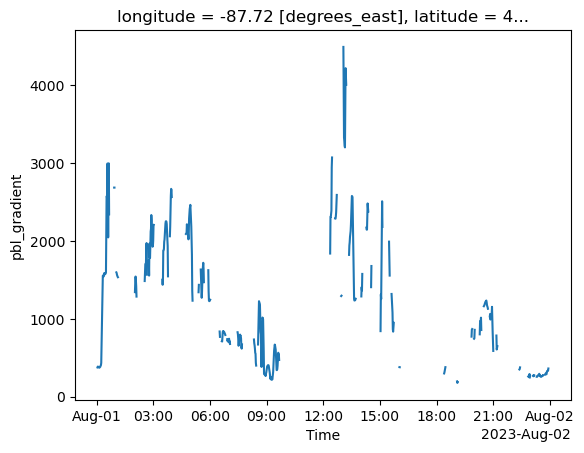

In [29]:
filter['pbl_gradient'].rolling(time=5).mean().plot()

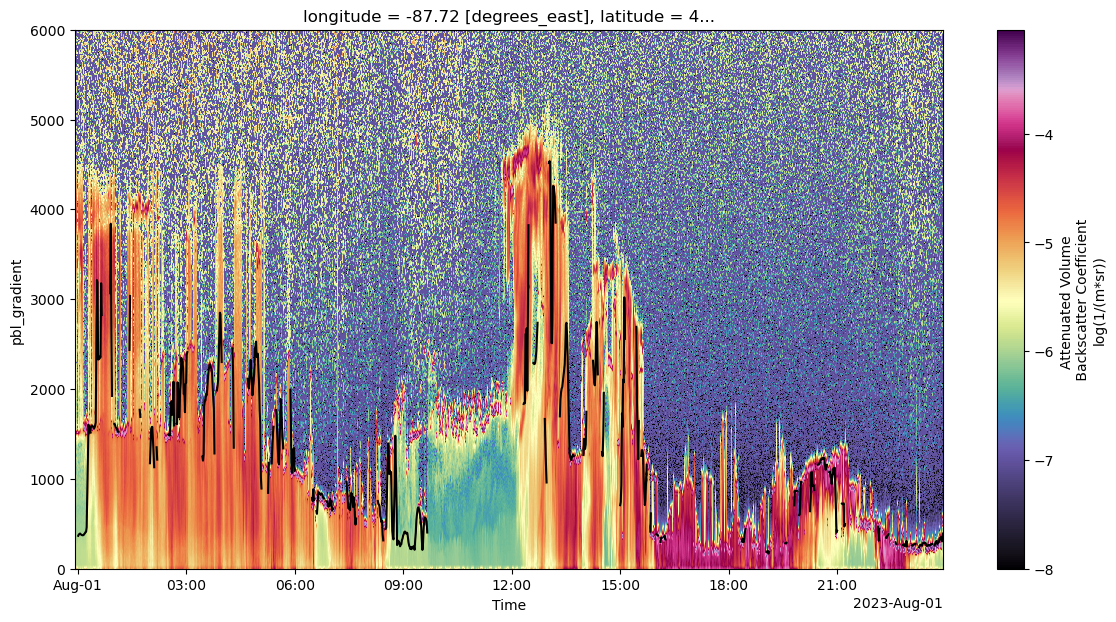

In [32]:
fig, axn = plt.subplots(1, 1, figsize=[14, 7])
cbs = ds["beta_att"].plot(x='time',
                          cmap='ChaseSpectral',
                          vmin=-8,
                          ax=axn,
                          add_labels=False,
                          add_colorbar=False
)
axn.set_ylabel("Height [m]")
axn.set_xlabel("Time [UTC]")
axn.set_ylim([0, 6000])
cbar = fig.colorbar(cbs)
cbar.set_label("Attenuated Volume \n Backscatter Coefficient \n" + ds["beta_att"].units)

# overlay the PBL Height
filter['pbl_gradient'].rolling(time=3).mean().plot(x="time", ax=axn, color='black')

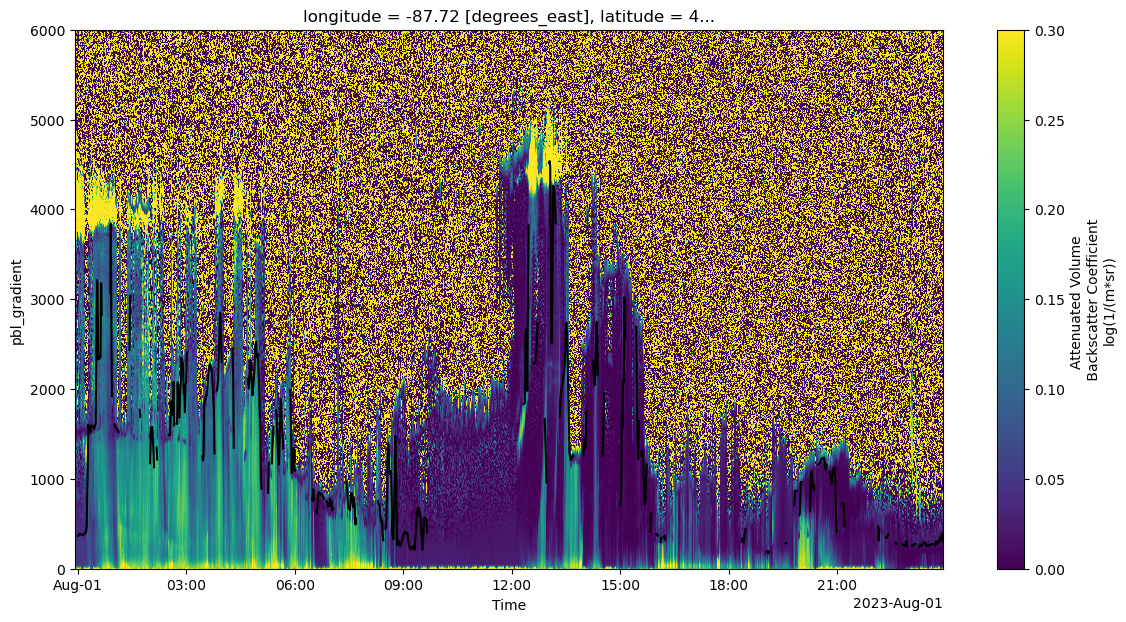

In [38]:
fig, axn = plt.subplots(1, 1, figsize=[14, 7])
cbs = ds["linear_depol_ratio"].plot(x='time',
                          vmin=0.0,
                          vmax=0.3,
                          ax=axn,
                          add_labels=False,
                          add_colorbar=False
)
axn.set_ylabel("Height [m]")
axn.set_xlabel("Time [UTC]")
axn.set_ylim([0, 6000])
cbar = fig.colorbar(cbs)
cbar.set_label("Attenuated Volume \n Backscatter Coefficient \n" + ds["beta_att"].units)

# overlay the PBL Height
filter['pbl_gradient'].rolling(time=3).mean().plot(x="time", ax=axn, color='black')